## Computer Vision I
### Trabajo Práctico II

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os
def gradients(img_original):
    img = img_original.copy()

    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    blur = cv.GaussianBlur(gray, (5, 5), 0)

    # Aplicamos Sobelx en 'float32' y luego convertimos de nuevo a 8-bit para evitar overflow
    sobelx_64 = cv.Sobel(blur, cv.CV_32F, 1, 0, ksize=3)
    sobelx_adj = sobelx_64 / 255
    absx_64 = np.absolute(sobelx_64)
    sobelx_8u1 = absx_64 / absx_64.max() * 255
    sobelx_8u = np.uint8(sobelx_8u1)

    # De igual modo para Sobely
    sobely_64 = cv.Sobel(blur, cv.CV_32F, 0, 1, ksize=3)
    sobely_adj = sobely_64 / 255
    absy_64 = np.absolute(sobely_64)
    sobely_8u1 = absy_64 / absy_64.max() * 255
    sobely_8u = np.uint8(sobely_8u1)

    # De los gradiente calculamos Magnitud y lo pasamos a 8-bit (Opcional)
    mag = np.hypot(sobelx_8u, sobely_8u)
    mag = mag / mag.max() * 255
    mag = np.uint8(mag)

    # Encontramos la Dirección y la pasamos a grados
    theta = np.arctan2(sobely_64, sobelx_64)
    angle = np.rad2deg(theta)

    grids = [sobelx_8u, sobely_8u, mag, angle]
    labels = ['Sobel X', 'Sobel Y', 'Magnitud', 'Angulo']

    for i, grid in enumerate(grids):
        plt.figure(i)
        plt.title(labels[i])
        plt.imshow(grid, cmap='gray')
        plt.show()

    fig, ax = plt.subplots()
    ax.set_title('Gradient Plot')
    x, y = np.meshgrid(np.arange(0, sobelx_adj.shape[0]), np.arange(0, sobelx_adj.shape[1]))
    ax.quiver(x, y, sobelx_adj, sobely_adj, mag, units='xy')
    plt.show()

    fig1, ax1 = plt.subplots(figsize=(15, 15))
    ax1.quiver(x[20:70, 20:70], y[20:70, 20:70], sobelx_adj[20:70, 20:70], sobely_adj[20:70, 20:70],
               mag[20:70, 20:70], units='xy')
    plt.show()


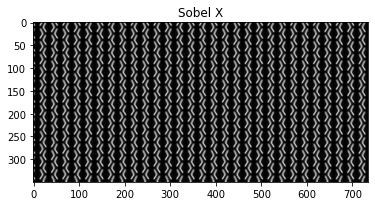

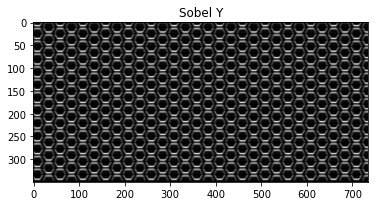

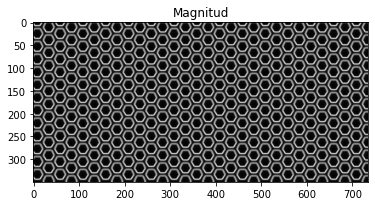

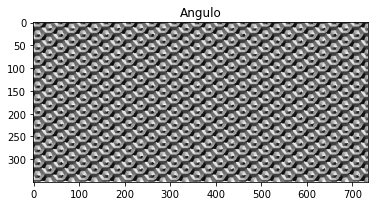

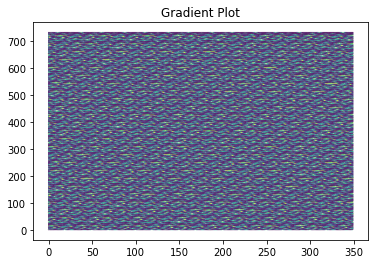

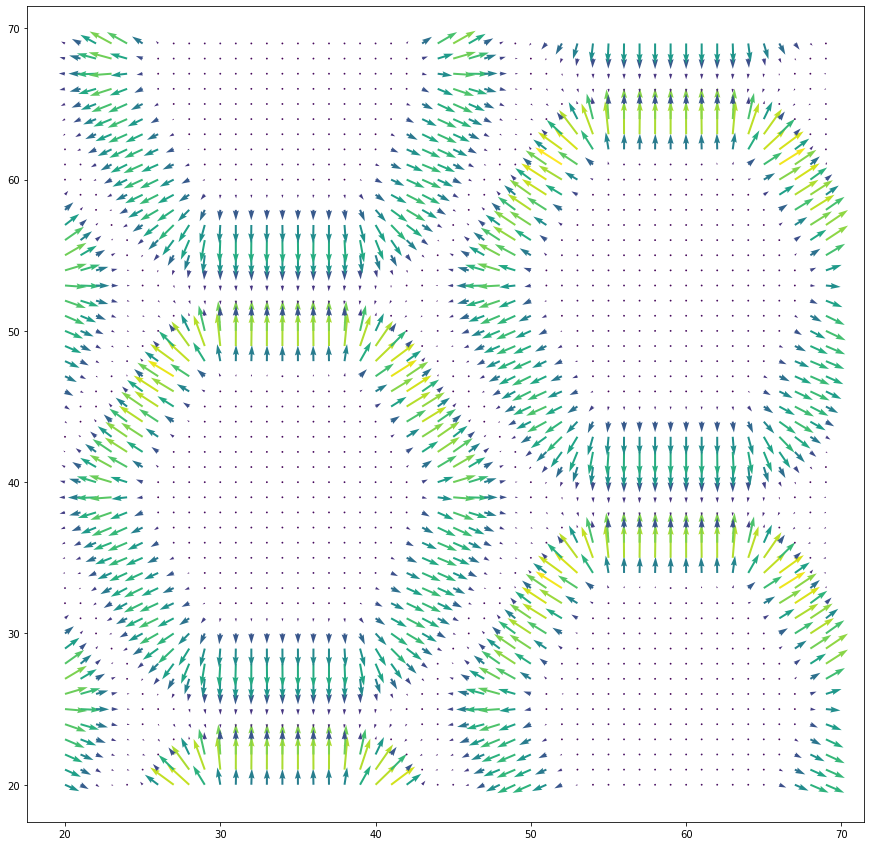

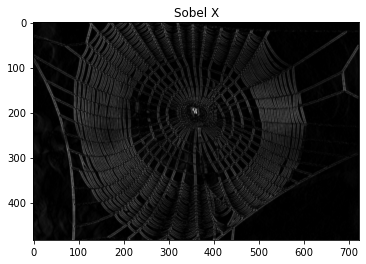

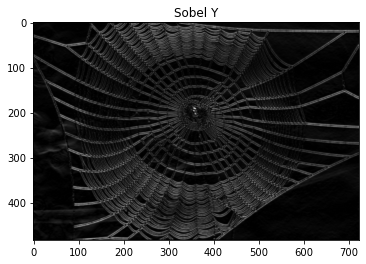

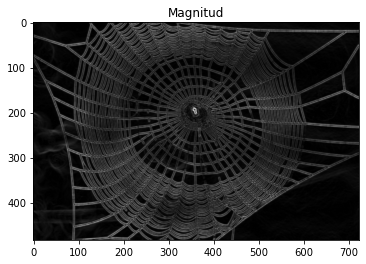

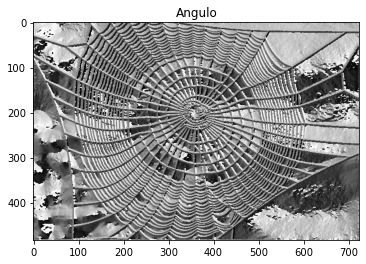

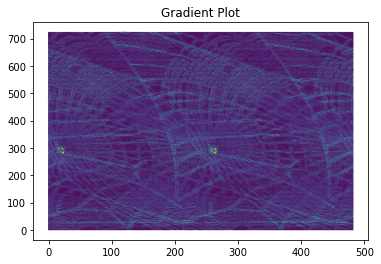

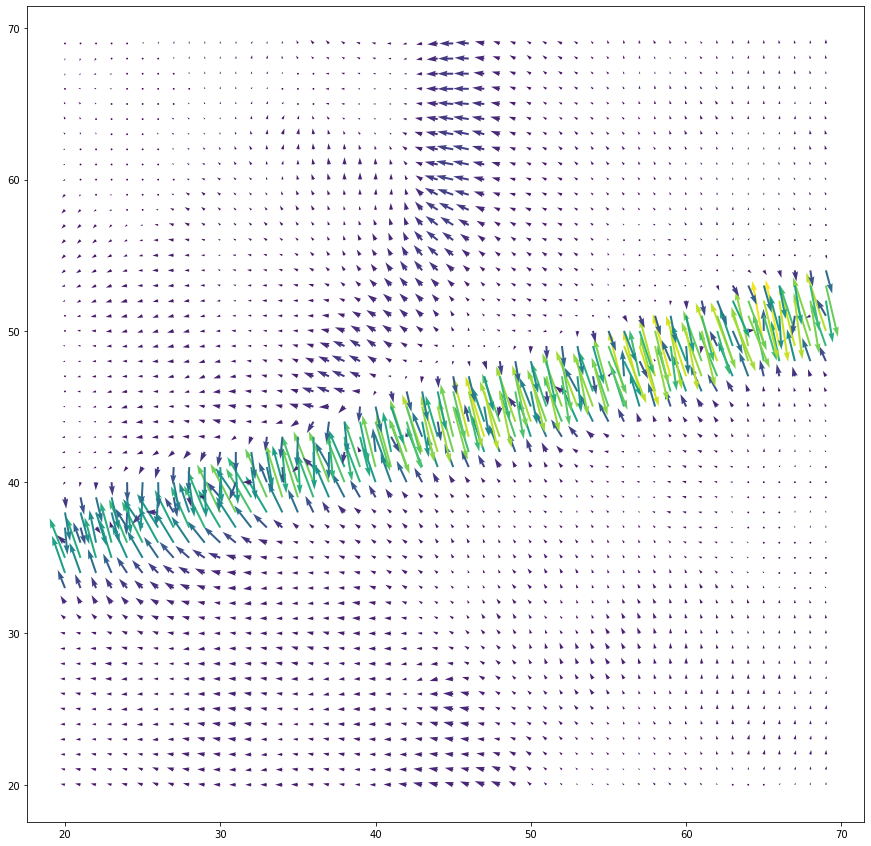

In [2]:
if __name__ == "__main__":
    folder = 'Images/Gradients/'

    for filename in os.listdir(folder):
        img_original = cv.imread(os.path.join(folder, filename))
        gradients(img_original)